# Question 4 and 5

In [1]:
#libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

## Open the file

In [2]:
file_path = 'co2_emissions2.csv'
df=pd.read_csv(file_path,index_col='Country')
df.head()

,renewable_energy_percentage,Alternative and nuclear energy (% of total energy use),fossil_fuel_energy_percentage,Energy use (kg of oil equivalent per capita),CO2 emissions (kt),CPIA policy and institutions for environmental sustainability rating (1=low to 6=high),GDP (current US$),"School enrollment, primary (% gross)",Employment in industry (% of total employment) (modeled ILO estimate),Population growth (annual %),Population
Country,,,,,,,,,,,
Algeria,0.1,0.030106,99.977917,1333.136069,161563.0,3.25,2.398995e+11,108.761642,30.850998,1.554019,45606480.0
Angola,52.9,2.548840,48.305593,540.864116,19814.5,2.50,8.472296e+10,88.574997,5.673967,3.030996,36684202.0
Argentina,9.2,5.501504,87.722407,2029.922825,154535.9,3.50,6.405914e+11,110.156113,19.954905,0.903771,46654581.0
Armenia,9.1,25.718264,74.561866,1023.809919,6746.6,3.00,2.421213e+10,92.902382,14.038897,-0.089917,2777970.0
Australia,12.3,2.154394,89.625630,5483.816402,378996.8,3.00,1.723827e+12,99.132988,18.636642,2.370900,26638544.0


## Binary target (Significant reduction)

In [3]:
df['Significant_Reduction'] = (df['CO2 emissions (kt)'].shift(-10) < df['CO2 emissions (kt)']).astype(int)

In [4]:
features = df.drop(columns=['School enrollment, primary (% gross)', 'CO2 emissions (kt)', 'Significant_Reduction'])
target = df['Significant_Reduction']

In [5]:
df['Significant_Reduction']

Country
Algeria                  1
Angola                   1
Argentina                1
Armenia                  0
Australia                1
                        ..
Tuvalu                   0
Uganda                   0
Vanuatu                  0
Virgin Islands (U.S.)    0
West Bank and Gaza       0
Name: Significant_Reduction, Length: 213, dtype: int32

### Splitting and testing the model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluationprint(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        34
           1       0.55      0.57      0.56        30

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64



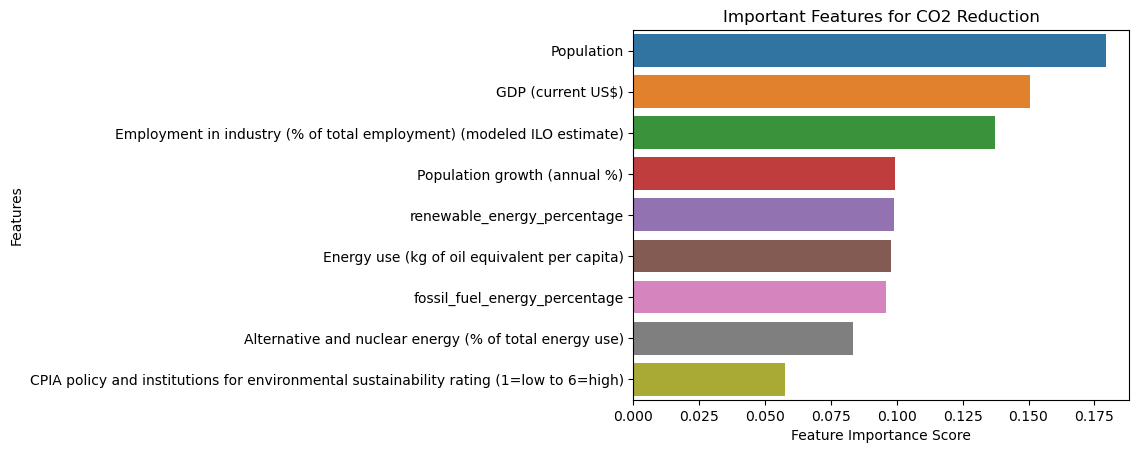

In [8]:
importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting feature importance
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features for CO2 Reduction')
plt.show()

# Question 5
## Hypotherical scenario

In [9]:
percent=10
df_filtrado = df[df['renewable_energy_percentage'] < percent]
nc = df_filtrado.shape[0]

print(f'The amount of countries that have a renewable energy percent below than {percent}% are {nc}.')

The amount of countries that have a renewable energy percent below than 10% are 67.


In [10]:
increase=50.0
df_filtrado.loc[df_filtrado['renewable_energy_percentage']<10,'renewable_energy_percentage'] = 50

In [11]:
df_filtrado=df_filtrado.drop(columns=['School enrollment, primary (% gross)', 'CO2 emissions (kt)', 'Significant_Reduction'])
df_scaled=scaler.transform(df_filtrado)

In [12]:
# Step 5: Strategic Analysis
# Predict the likelihood of CO2 reduction in this scenario
prediction = model.predict_proba(df_scaled)
df_filtrado['prediction']=prediction[:, 1]

In [13]:
dt_sc= df_filtrado[df_filtrado['prediction'] >=0.5]
dt_usc = df_filtrado[df_filtrado['prediction'] < 0.5]

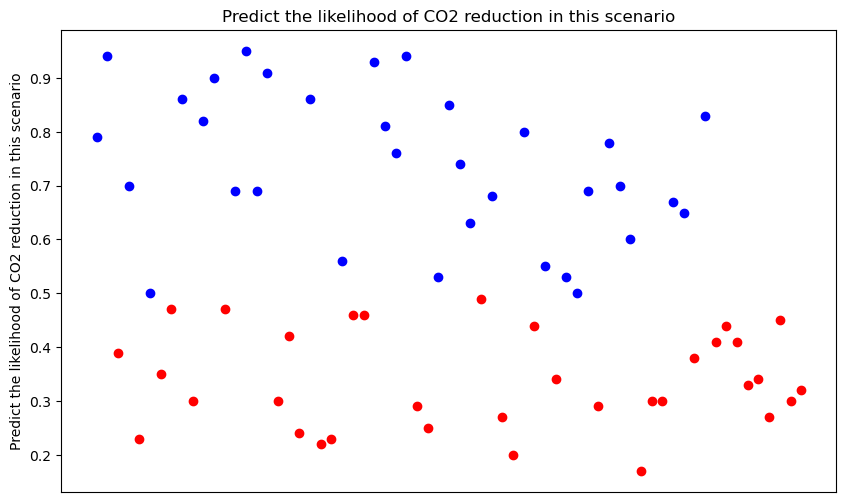

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
#color= ['red' if yi > .5 else 'blue' for yi in df_filtrado['prediction']]
for i in range(nc):
    if df_filtrado['prediction'][i]>=0.5:
        plt.plot(df_filtrado.index[i], df_filtrado['prediction'][i], c='blue',linestyle='', marker='o')
    else:
        plt.plot(df_filtrado.index[i], df_filtrado['prediction'][i], c='red',linestyle='', marker='o')
            


#plt.plot(df_blue.index, df_blue['prediction'], c='blue',linestyle='', marker='o')

#plt.plot(df.index, df['CO2 emissions (kt)'], color='red',label='Current Emission')
# Agregar etiquetas y título
plt.xlabel('')
plt.ylabel('Predict the likelihood of CO2 reduction in this scenario')
plt.title('Predict the likelihood of CO2 reduction in this scenario')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

In [19]:
print(f'Number countries where there is a likelihood of significant CO2 reduction: {dt_sc.shape[0]}')
print(f'Number countries where there is no a likelihood of significant CO2 reduction: {dt_usc.shape[0]}')

Number countries where there is a likelihood of significant CO2 reduction: 33
Number countries where there is no a likelihood of significant CO2 reduction: 34


In [25]:
print('Countries where there is a likelihood of significant CO2 reduction')
for i in range(dt_sc.shape[0]):
    print( f'{dt_sc.index[i]} ')
    print(dt_sc['prediction'][i])

Countries where there is a likelihood of significant CO2 reduction
Algeria 
0.79
Argentina 
0.94
Azerbaijan 
0.7
Belarus 
0.5
Egypt, Arab Rep. 
0.86
Hong Kong SAR, China 
0.82
Iran, Islamic Rep. 
0.9
Israel 
0.69
Japan 
0.95
Kazakhstan 
0.69
Korea, Rep. 
0.91
Malaysia 
0.86
Mongolia 
0.56
Russian Federation 
0.93
Saudi Arabia 
0.81
Singapore 
0.76
South Africa 
0.94
Turkmenistan 
0.53
Ukraine 
0.85
United Arab Emirates 
0.74
Uzbekistan 
0.63
American Samoa 
0.68
Bahamas, The 
0.8
Bermuda 
0.55
Cayman Islands 
0.53
Dominica 
0.5
Equatorial Guinea 
0.69
French Polynesia 
0.78
Guam 
0.7
Isle of Man 
0.6
New Caledonia 
0.67
Northern Mariana Islands 
0.65
Puerto Rico 
0.83


In [17]:
print('Countries where there is not a likelihood of significant CO2 reduction')
for i in range(dt_sc.shape[0]):
    print( f'{dt_sc.index[i]}' )

Countries where there is not a likelihood of significant CO2 reduction
Algeria
Argentina
Azerbaijan
Belarus
Egypt, Arab Rep.
Hong Kong SAR, China
Iran, Islamic Rep.
Israel
Japan
Kazakhstan
Korea, Rep.
Malaysia
Mongolia
Russian Federation
Saudi Arabia
Singapore
South Africa
Turkmenistan
Ukraine
United Arab Emirates
Uzbekistan
American Samoa
Bahamas, The
Bermuda
Cayman Islands
Dominica
Equatorial Guinea
French Polynesia
Guam
Isle of Man
New Caledonia
Northern Mariana Islands
Puerto Rico
